In [3]:
# import sys
# my_path = r"C:\Users\alomb\OneDrive\new_racine\Documents\_Pro\CODE\Data_analysis"
# if my_path not in sys.path : sys.path.append(my_path); print("path added")

from f_analyse import * 

# Operators on T_signal

## Sum

(0.0, 2.0998819185904205)

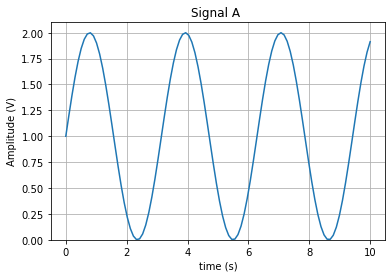

In [4]:
X = np.linspace(0,10,100)
Y = np.sin(2*X)+1
sigA = T_signal(data=Y,fs=10,unit='V',name='Signal A')
sigA.plot()
plt.ylim(0)


verifier le type


(0.0, 12.099881918590421)

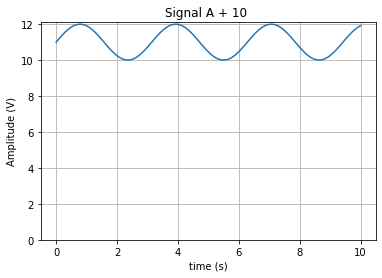

In [5]:
sigB = sigA + 10
sigB.plot()
plt.ylim(0)

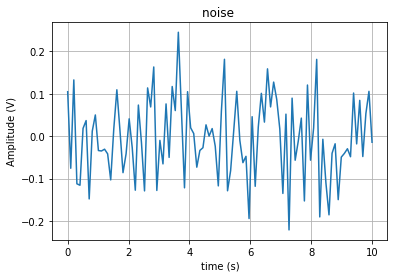

In [6]:
Y_noise = np.random.normal(0,0.1,len(X))
sig_noise = T_signal(data=Y_noise,fs=10,unit='V',name='noise')
sig_noise.plot()

verifier le type
verifier le type


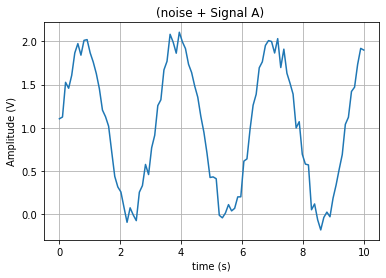

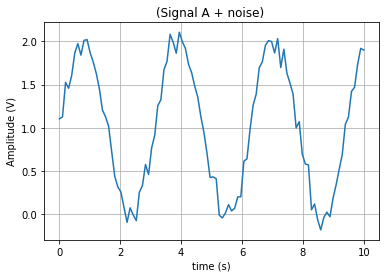

In [7]:
(sig_noise + sigA).plot()
(sigA + sig_noise).plot()

In [8]:
sig_noise.recut(0,5)

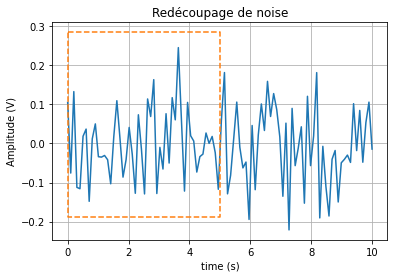

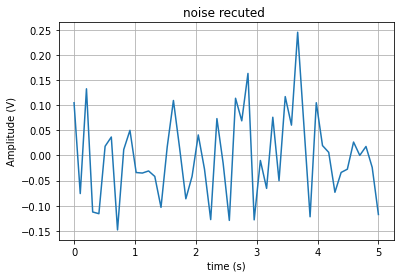

In [9]:
sig_noise.plot()
sig_noise.plot_ADD_box(0,5)
plt.title("Redécoupage de noise")

small_noise = sig_noise.recut(0,5)
small_noise.plot()

In [10]:
class test:
    arr = np.array([1,2,3])

T = test()
np.pad(T.arr,(0,5))

array([1, 2, 3, 0, 0, 0, 0, 0])

## Somme de signaux de tailles différentes

verifier le type
fill due to different duration
verifier le type
fill due to different duration


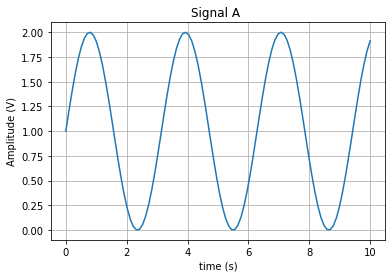

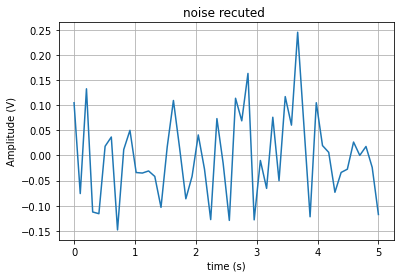

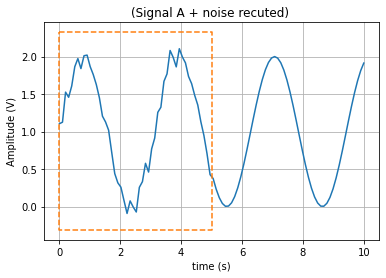

In [11]:
sigA.plot()
small_noise.plot()
(sigA + small_noise).plot()
(sigA + small_noise).plot_ADD_box(0,5)

## Somme de signaux ayant des t0 différents

In [12]:
sigA.N

100

verifier le type
fill due to different t0
fill due to different duration


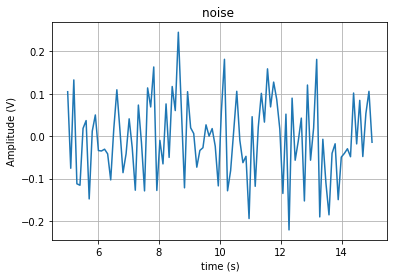

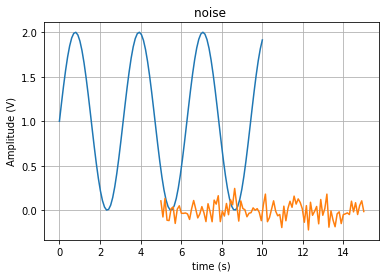

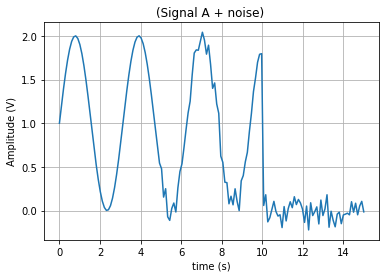

In [13]:
sig_noise2 = sig_noise.copy()
sig_noise2.t0 = 5
sig_noise2.plot()

sigA.plot()
sig_noise2.plot(new_figure=False)

(sigA + sig_noise2).plot()

## Multiplication

verifier le type
verifier le type


(0.0, 5.0)

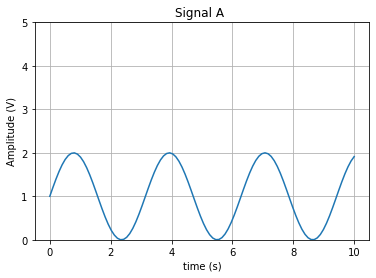

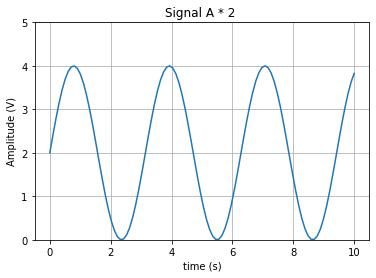

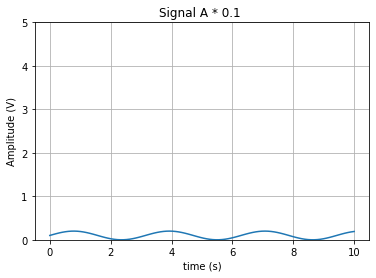

In [14]:
sigA.plot()
plt.ylim(0,5)

(sigA*2).plot()
plt.ylim(0,5)

(sigA*0.1).plot()
plt.ylim(0,5)

verifier le type


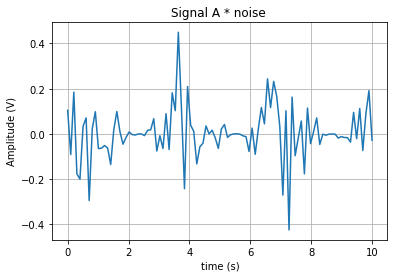

In [15]:
(sigA * sig_noise).plot()

## Division

verifier le type


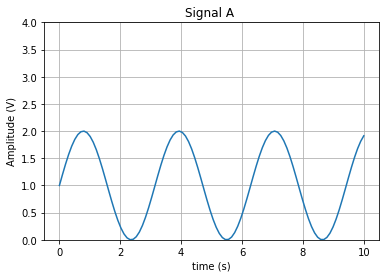

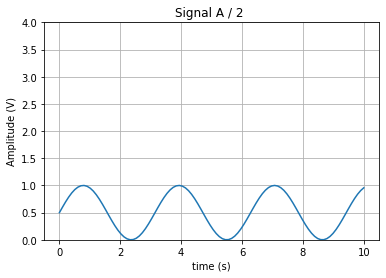

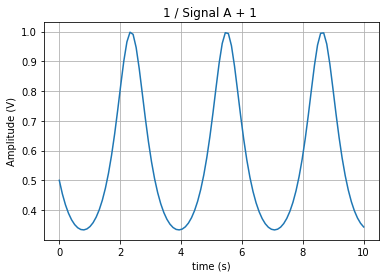

In [16]:
sigA.plot()
plt.ylim(0,4)

(sigA / 2).plot()
plt.ylim(0,4)

(1/(sigA + 1)).plot()

## Substraction

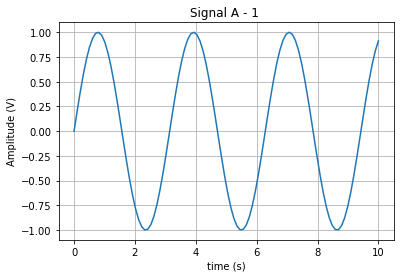

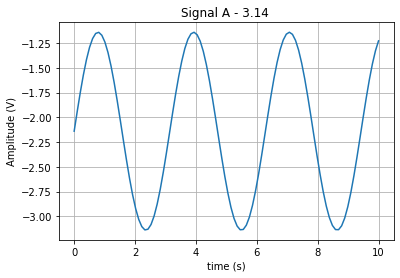

In [17]:
(sigA- 1).plot()
(sigA- 3.14).plot()

c:\Users\alomb\OneDrive\new_racine\Documents\CODE\BIB\Data_analysis\f_analyse.py:407: RuntimeWarning: divide by zero encountered in divide
  new_sig.data = val / new_sig.data


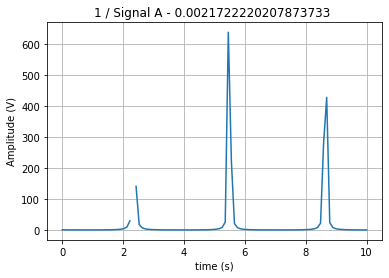

In [18]:
(1/(sigA - sigA.min())).plot()

# Time to Fourier

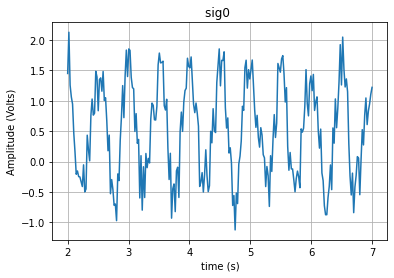

In [19]:
fs = 50
X = np.linspace(0,10,5*fs)
Y = np.cos(2*np.pi*X) + 0.2*np.cos(1.56*2*np.pi*X) + 1*np.random.random(size=len(X))

sig0 = T_signal(data = Y,
                fs = fs,
                unit = 'Volts',
                name = 'sig0',
                t0 = 2)

sig0.plot()

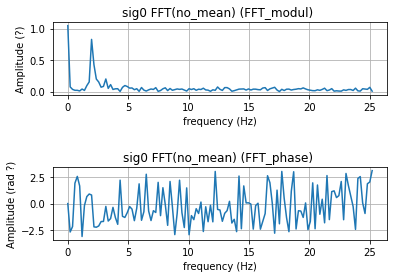

In [20]:
sig0.fft().plot()

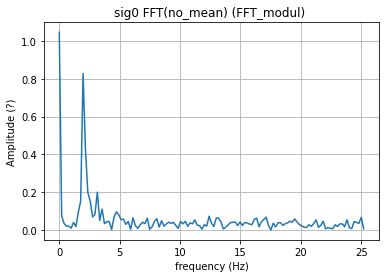

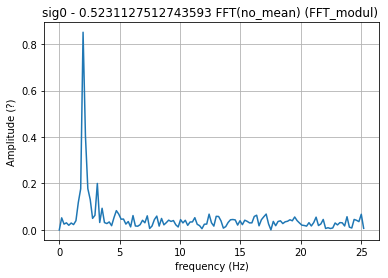

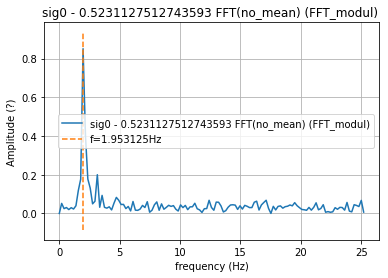

In [21]:
sig0.fft().plotM()
(sig0 - sig0.mean()).fft().plotM()

(sig0 - sig0.mean()).fft().plotM()
(sig0 - sig0.mean()).fft().plotM_ADD_f_at_max()
plt.legend()


## Zero Pading

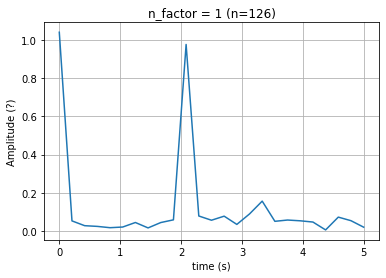

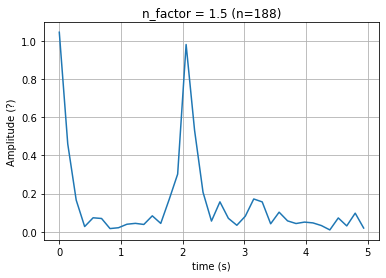

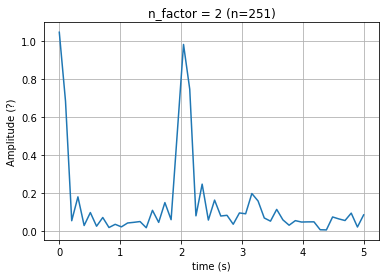

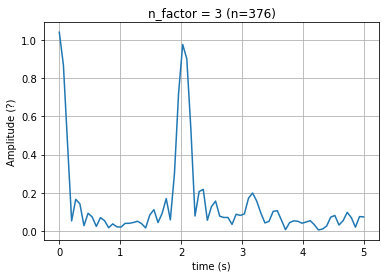

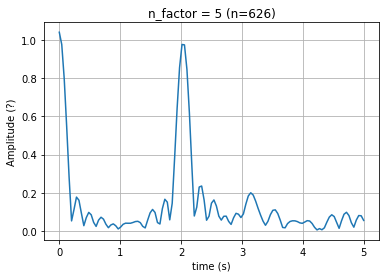

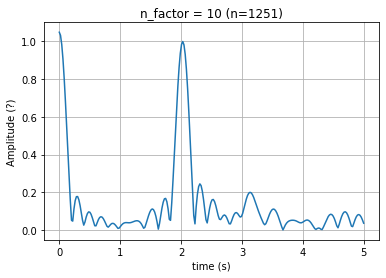

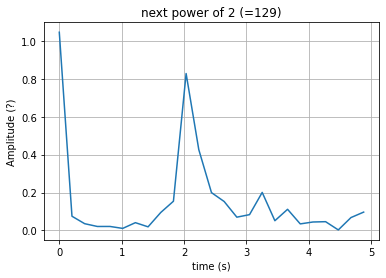

In [22]:
for n_factor in [1,1.5,2,3,5,10] :
    Sfft = sig0.fft(choose_next_power_of_2=False,n_factor=n_factor)
    n_used = Sfft.N
    Sfft.Modul.recut(0,5).plot()
    plt.title(f"n_factor = {n_factor} (n={n_used})")
Sfft = sig0.fft(choose_next_power_of_2=True)
n_used = Sfft.N
Sfft.Modul.recut(0,5).plot()
plt.title(f"next power of 2 (={n_used})");

# Fourier to Time

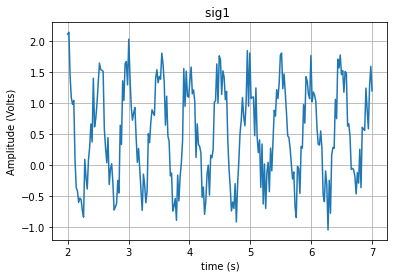

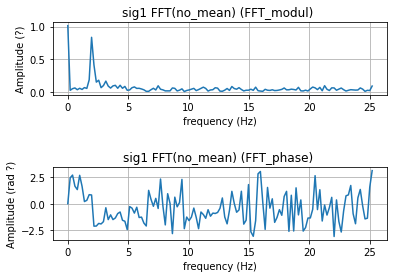

In [23]:
fs = 50
X = np.linspace(0,10,5*fs)
Y = np.cos(2*np.pi*X) + 0.2*np.cos(1.56*2*np.pi*X) + 1*np.random.random(size=len(X))

sig1 = T_signal(data = Y,
                fs = fs,
                unit = 'Volts',
                name = 'sig1',
                t0 = 2)

sig1.plot()
sig1_fft = sig1.fft()
sig1_fft.plot()

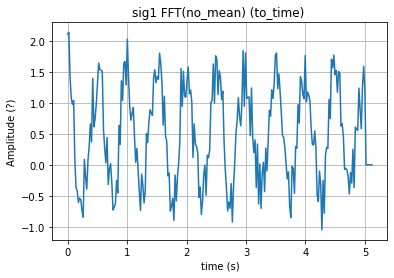

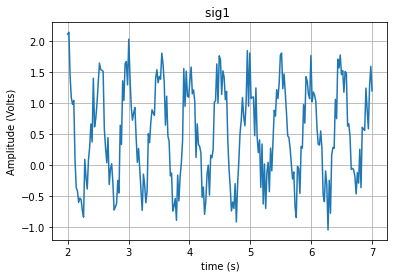

In [24]:
sig1_fft.ifft().plot()
sig1.plot()